<a href="https://colab.research.google.com/github/merfurfu/IAT481A2/blob/main/CompletedA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install opencv-python
!pip install nltk
!pip install librosa

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import nltk
import librosa


In [4]:
# Get the critical imports out of the way
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML
# Center matplotlib figures...
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    #print(stft_spectrogram.shape)
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    #print(chromagram.shape)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

In [41]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)
        feature_matrix=np.array([])

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

In [42]:

#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [43]:
#sex in RAVDESS female actors are even, male actors are odd
genderRAV = {
    '01' : "male",
    '02': 'female',
    '03' : "male",
    '04': 'female',
    '05' : "male",
    '06': 'female',
    '07' : "male",
    '08': 'female',
    '09' : "male",
    '10': 'female',
    '11' : "male",
    '12': 'female',
    '13' : "male",
    '14': 'female',
    '15' : "male",
    '16': 'female',
    '17' : "male",
    '18': 'female',
    '19' : "male",
    '20': 'female',
    '21' : "male",
    '22': 'female',
    '23' : "male",
    '24': 'female'
}

In [44]:
#Emotions in the EmoDB dataset
emotionsEmo = {
  'W':'angry',
  'F':'happy',
  'T':'sad',
  'E':'disgust',
  'N':'neutral',
  'A':'fearful',
  'L':'boredom'
}

In [45]:
#geners in the EmoDB dataset
genderEmo = {
  "03":"male",
  "10":"male",
  "11":"male",
  "12":"male",
  "15":"male",
  "08":"female",
  "09":"female",
  "13":"female",
  "14":"female",
  "16":"female"
}

In [46]:
import os, glob

#there are 535 voice samples in EmoDB
def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/wav/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)

        #since the emotion tag is on the fifth char we are using this to pull that one out
        emotion=emotionsEmo[(file_name[5])]
        #print(emotion)
        features = get_features(file)

        X.append(features)
        y.append(emotion)
        count += 1
        #changing it to 535 because EmoDB has 535 audio samples
        print('\r' + f' Processed {count}/{535} audio samples',end=' ')
    return np.array(X), np.array(y)


In [47]:
featuresEmo, emotionsEmo = load_data()

 Processed 535/535 audio samples 

In [13]:
def get_genderemo():
  s = []
  count = 0
  for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/wav/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #sex of participant is indicated as the first 2 chars and puts it in the array
        gender = genderEmo[(file_name[:2])]
        s.append(gender)
        count += 1
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
  return np.array(s)

In [14]:
genderEmo =  get_genderemo()

 Processed 535/1435 audio samples 

In [15]:
#1440 audio files?
def load_dataRAV():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)
        #print(file_name.split("-")[2])

        emotion=emotions[(file_name.split("-")[2])]
        #print(emotion)
        features = get_features(file)

        X.append(features)
        y.append(emotion)
        count += 1
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
    return np.array(X), np.array(y)

In [20]:
def get_genderRAVDESS():
  s = []
  count = 0
  for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #maybe take out .wav first?
        tempname = file_name.strip(".wav")
        #sex of participant is indicated as the last segment and puts it in the array
        gender = genderRAV[(tempname.split("-")[6])]
        #this code also works

        #gender = genderRAV[(file_name.split("-")[-1])]
        s.append(gender)
        count += 1
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
  return np.array(s)

In [21]:
genderRAV = get_genderRAVDESS()

 Processed 1435/1435 audio samples 

In [18]:
features, emotions = load_dataRAV()

 Processed 1435/1435 audio samples 

In [22]:
#deletes boredom from EmoDB dataset
emotionsberlin = np.delete(emotionsEmo, emotionsEmo == "boredom")
#takes all the unique values and re applies to the same array
#emotionsberlin = np.unique(emotionsberlin)
#print(emotionsberlin)

In [23]:
#deletes calm from ravdess emotion
emotions1= np.delete(emotions, emotions == "calm")
#secondary filter to remove surprise
emotionsr = np.delete(emotions1, emotions1 == "surprised")
#takes all the unique values and re applies to the same array so we see if we really did del successfully
#emotionsr = np.unique(emotionsr)
#print(emotionsr)

In [ ]:
#merged emotions for both ravdess and emodb
emotionsall = np.concatenate((emotionsr, emotionsberlin))
#print(emotionsall)
#head(emotionsall)


In [77]:
?emotionsberlin

In [27]:
#merging gender from both EmoDB and ravdess
genderall = np.concatenate((genderRAV, genderEmo))

In [51]:
#merging features but idk if i'll be needing to use this? but just in case lol
featuresall = np.concatenate((features, featuresEmo))

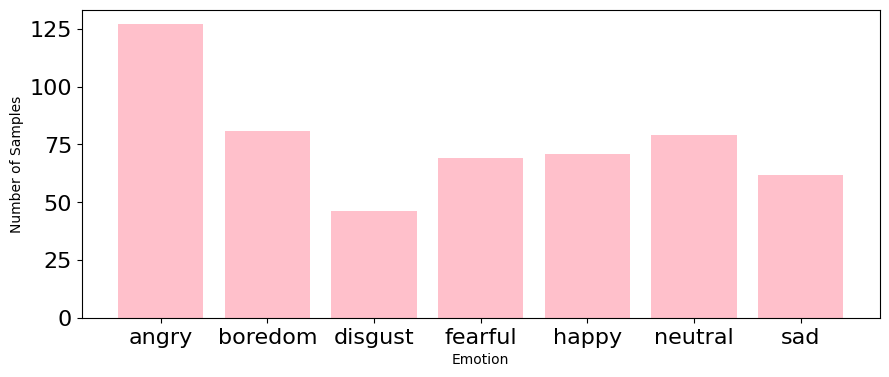

In [28]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotionsEmo, return_counts=True)

#print(emotion_list)
#emotion_list = np.delete(emotion_list, np.where(emotion_list == ["boredom"]))
plt.bar(x=range(7), height=count, color = "pink")
plt.xticks(ticks=range(7), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

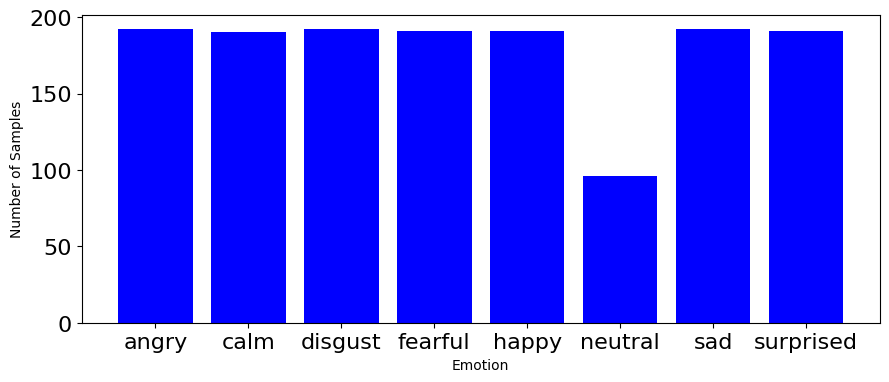

In [29]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,2)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count, color = "blue")
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

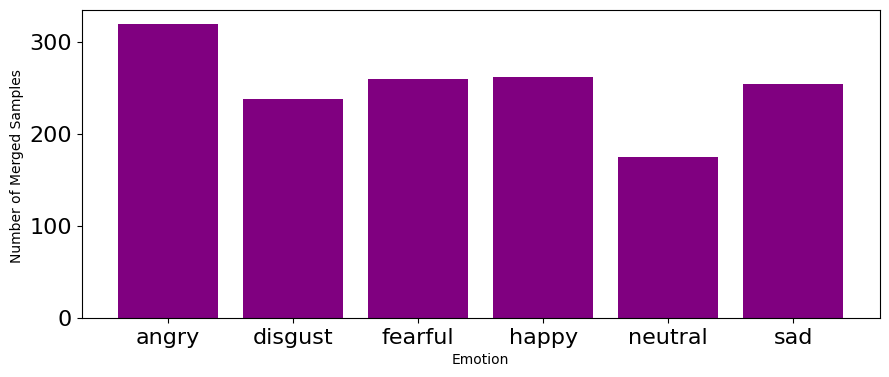

In [30]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,2)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotionsall, return_counts=True)
plt.bar(x=range(6), height=count, color = "purple")
plt.xticks(ticks=range(6), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Merged Samples ')
plt.show()

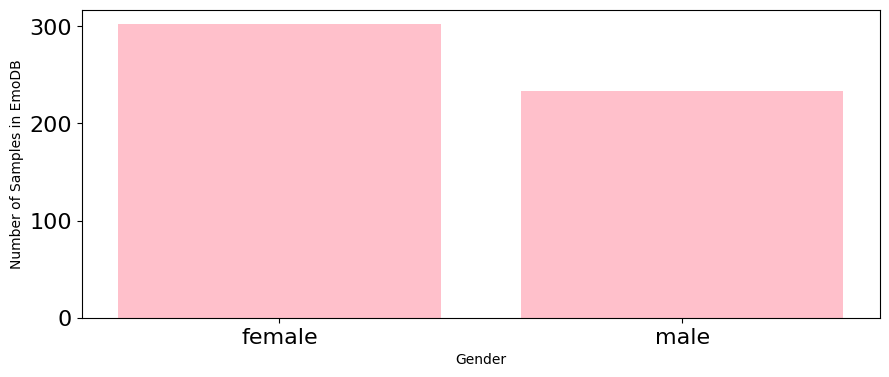

In [31]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
genderemo_list, count = np.unique(genderEmo, return_counts=True)

plt.bar(x=range(2), height=count, color = "pink")
plt.xticks(ticks=range(2), labels = [gender for gender in genderemo_list],fontsize=10)
plt.xlabel('Gender')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples in EmoDB')
plt.show()

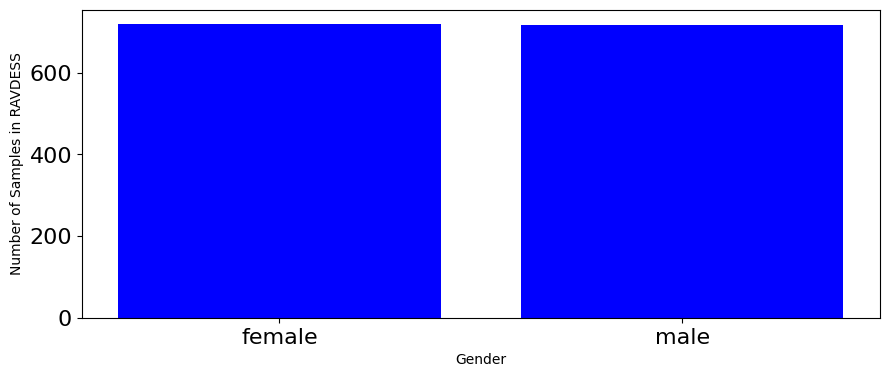

In [33]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
genderrav_list, count = np.unique(genderRAV, return_counts=True)

#print(emotion_list)
#emotion_list = np.delete(emotion_list, np.where(emotion_list == ["boredom"]))
plt.bar(x=range(2), height=count, color = "blue")
plt.xticks(ticks=range(2), labels = [gender for gender in genderrav_list],fontsize=10)
plt.xlabel('Gender')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples in RAVDESS')
plt.show()

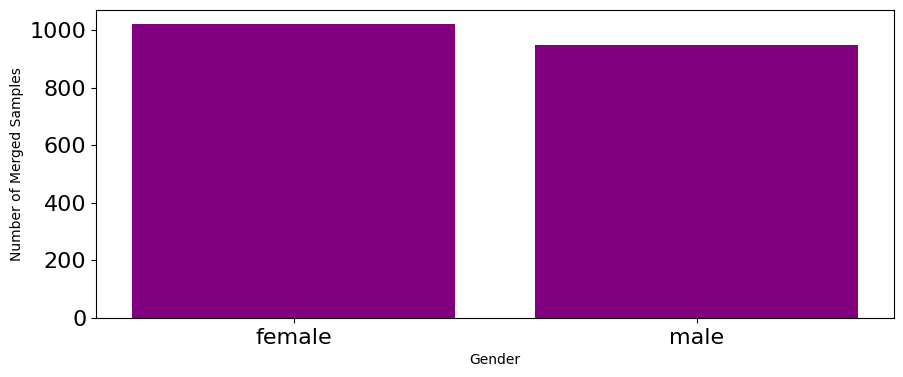

In [36]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
genderall_list, count = np.unique(genderall, return_counts=True)

#print(emotion_list)
#emotion_list = np.delete(emotion_list, np.where(emotion_list == ["boredom"]))
plt.bar(x=range(2), height=count, color = "purple")
plt.xticks(ticks=range(2), labels = [gender for gender in genderall_list],fontsize=10)
plt.xlabel('Gender')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Merged Samples')
plt.show()

In [37]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # this is for RAVDESS data
features_df


Audio samples represented: 1435
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.617466,0.576461,0.569040,0.609814,0.654684,0.701384,0.735561,0.717063,0.728129,0.702318,...,-3.581316,-0.467617,-3.222230,0.313375,3.955157,-0.183977,1.367951,2.254531,-0.198084,4.343905
1,0.623919,0.574488,0.517403,0.513132,0.550291,0.568414,0.568268,0.579836,0.644346,0.689928,...,1.126486,3.953426,1.156003,6.056956,5.954752,3.322112,6.695466,4.928186,3.682733,4.037534
2,0.503092,0.500758,0.474714,0.501313,0.573869,0.604987,0.556901,0.569272,0.661844,0.735248,...,-1.041501,1.307965,0.363679,5.471038,7.249944,8.715325,10.268682,9.382307,6.510154,2.336356
3,0.677821,0.616982,0.615782,0.621085,0.626168,0.646080,0.691546,0.685554,0.722938,0.696742,...,-1.149269,1.404988,-1.316433,3.550398,3.366586,0.352723,2.582228,2.148702,1.180273,4.521074
4,0.512131,0.457755,0.478713,0.520813,0.516800,0.540460,0.621741,0.673709,0.763157,0.709443,...,-2.535597,1.397879,-0.517047,5.022032,7.575803,4.056076,4.256593,3.530471,4.952089,5.641845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.639658,0.634329,0.655832,0.664202,0.676282,0.709708,0.767232,0.797122,0.820559,0.776192,...,-0.982834,-3.941438,-1.568234,-0.911202,-1.684332,-0.180414,-1.289849,-1.290700,-1.424315,-1.072947
1431,0.685525,0.688144,0.690283,0.755877,0.820215,0.821966,0.801405,0.782814,0.742455,0.718314,...,-1.831094,-1.542663,-0.201960,-0.480004,0.557405,0.270044,-1.388379,0.114239,-0.770378,-0.304880
1432,0.645078,0.669609,0.699656,0.684427,0.701292,0.757168,0.760762,0.719712,0.724569,0.740335,...,-1.366737,-3.429536,-2.701700,-2.545479,-2.373800,-1.142668,-0.932497,-2.504158,-4.573127,-2.491820
1433,0.649360,0.663266,0.667998,0.726094,0.785460,0.802168,0.792829,0.793844,0.756972,0.711162,...,-1.713587,-1.361203,-1.172765,-0.611027,0.773962,-0.374147,-1.157781,-0.118639,-1.210494,-0.525753


In [50]:
print(f'\nAudio samples represented: {featuresEmo.shape[0]}')
print(f'Numerical features extracted per sample: {featuresEmo.shape[1]}')
featuresEmo_df = pd.DataFrame(featuresEmo) #  this is for Emo data
featuresEmo_df


Audio samples represented: 535
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.442170,0.464056,0.636860,0.662784,0.615532,0.600939,0.624709,0.605680,0.581108,0.558237,...,0.719429,3.084020,1.852170,0.008186,0.793659,3.111281,4.366918,5.236897,6.125819,8.279994
1,0.512430,0.510294,0.459201,0.443788,0.449438,0.525114,0.558915,0.578249,0.538400,0.434801,...,5.417458,3.695324,3.236434,3.779519,0.930603,3.279610,0.523795,2.728744,0.176616,1.251140
2,0.477399,0.481700,0.469323,0.447335,0.468794,0.591852,0.729825,0.818915,0.744749,0.601236,...,9.318092,6.190225,10.210866,8.599792,7.517327,3.568608,2.706643,0.351747,-1.561297,0.364550
3,0.427667,0.413010,0.451438,0.506263,0.505631,0.543930,0.626031,0.726948,0.814510,0.675843,...,12.107535,12.279271,8.584341,7.363523,5.483637,5.392119,2.537245,1.745779,-1.973541,-0.268733
4,0.468610,0.434015,0.419028,0.456317,0.512585,0.544711,0.551241,0.547206,0.560930,0.574936,...,10.215386,4.891962,4.721510,6.349585,5.238574,3.251419,1.313929,1.060090,-0.260430,1.915074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.481878,0.496651,0.520209,0.600274,0.628352,0.612725,0.619971,0.625098,0.654823,0.681950,...,3.345176,7.280564,5.355759,9.268687,6.818369,5.190013,1.117009,1.985786,2.264751,3.843456
531,0.568712,0.559736,0.538134,0.579595,0.620166,0.645028,0.636419,0.571695,0.659758,0.743742,...,-2.585839,-1.601897,-3.021371,-2.886148,-1.943873,-2.438022,-3.135060,-3.092232,-2.822967,-3.282818
532,0.579169,0.572430,0.630092,0.732100,0.773381,0.661667,0.589054,0.571403,0.589526,0.608355,...,-3.817281,-3.221976,-3.704770,-2.028499,-0.986293,1.225621,2.681724,5.840805,7.422238,7.979437
533,0.517160,0.534542,0.588241,0.672317,0.658637,0.615873,0.631204,0.730236,0.817517,0.767572,...,-3.551078,-2.459805,-4.511292,-3.591444,-3.006527,-2.028956,-3.565543,-1.432994,-2.810869,-1.423681


In [71]:
print(f'\nAudio samples represented: {featuresall.shape[0]}')
print(f'Numerical features extracted per sample: {featuresall.shape[1]}')
featuresall_df = pd.DataFrame(featuresall) #  this is for the merged data
featuresall_df


Audio samples represented: 1970
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.617466,0.576461,0.569040,0.609814,0.654684,0.701384,0.735561,0.717063,0.728129,0.702318,...,-3.581316,-0.467617,-3.222230,0.313375,3.955157,-0.183977,1.367951,2.254531,-0.198084,4.343905
1,0.623919,0.574488,0.517403,0.513132,0.550291,0.568414,0.568268,0.579836,0.644346,0.689928,...,1.126486,3.953426,1.156003,6.056956,5.954752,3.322112,6.695466,4.928186,3.682733,4.037534
2,0.503092,0.500758,0.474714,0.501313,0.573869,0.604987,0.556901,0.569272,0.661844,0.735248,...,-1.041501,1.307965,0.363679,5.471038,7.249944,8.715325,10.268682,9.382307,6.510154,2.336356
3,0.677821,0.616982,0.615782,0.621085,0.626168,0.646080,0.691546,0.685554,0.722938,0.696742,...,-1.149269,1.404988,-1.316433,3.550398,3.366586,0.352723,2.582228,2.148702,1.180273,4.521074
4,0.512131,0.457755,0.478713,0.520813,0.516800,0.540460,0.621741,0.673709,0.763157,0.709443,...,-2.535597,1.397879,-0.517047,5.022032,7.575803,4.056076,4.256593,3.530471,4.952089,5.641845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,0.481878,0.496651,0.520209,0.600274,0.628352,0.612725,0.619971,0.625098,0.654823,0.681950,...,3.345176,7.280564,5.355759,9.268687,6.818369,5.190013,1.117009,1.985786,2.264751,3.843456
1966,0.568712,0.559736,0.538134,0.579595,0.620166,0.645028,0.636419,0.571695,0.659758,0.743742,...,-2.585839,-1.601897,-3.021371,-2.886148,-1.943873,-2.438022,-3.135060,-3.092232,-2.822967,-3.282818
1967,0.579169,0.572430,0.630092,0.732100,0.773381,0.661667,0.589054,0.571403,0.589526,0.608355,...,-3.817281,-3.221976,-3.704770,-2.028499,-0.986293,1.225621,2.681724,5.840805,7.422238,7.979437
1968,0.517160,0.534542,0.588241,0.672317,0.658637,0.615873,0.631204,0.730236,0.817517,0.767572,...,-3.551078,-2.459805,-4.511292,-3.591444,-3.006527,-2.028956,-3.565543,-1.432994,-2.810869,-1.423681


In [52]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)

12 Chromagram features:           min = 0.310,     max = 0.874,     mean = 0.666,     deviation = 0.085

128 Mel Spectrogram features:     min = 0.000,     max = 149.208,     mean = 0.188,     deviation = 1.600

40 MFCC features:                 min = -873.242,    max = 115.126,    mean = -14.626,    deviation = 98.494


In [54]:
print_features(featuresEmo_df)

12 Chromagram features:           min = 0.276,     max = 0.888,     mean = 0.580,     deviation = 0.088

128 Mel Spectrogram features:     min = 0.000,     max = 886.647,     mean = 4.159,     deviation = 18.173

40 MFCC features:                 min = -308.707,    max = 123.842,    mean = -3.721,    deviation = 35.084


In [72]:
print_features(featuresall_df)

12 Chromagram features:           min = 0.276,     max = 0.888,     mean = 0.642,     deviation = 0.094

128 Mel Spectrogram features:     min = 0.000,     max = 886.647,     mean = 1.266,     deviation = 9.730

40 MFCC features:                 min = -873.242,    max = 123.842,    mean = -11.664,    deviation = 86.164


In [62]:
#we're going to need to scale both RAVDESS and EmoDB

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
mmscaler = MinMaxScaler()

In [65]:
# features for RAVDESS
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

features_minmax = features
features_minmax = mmscaler.fit_transform(features_minmax)

In [66]:
#features for EmoDB
featuresEmo_scaled = featuresEmo
featuresEmo_scaled = scaler.fit_transform(featuresEmo_scaled)

featuresEmo_minmax = featuresEmo
featuresEmo_minmax = mmscaler.fit_transform(featuresEmo_minmax)

In [73]:
#features for the entire merged features list
featuresall_scaled = featuresall
featuresall_scaled = scaler.fit_transform(featuresall_scaled)

featuresall_minmax = featuresall
featuresall_minmax = mmscaler.fit_transform(featuresall_minmax)

In [69]:
#standard and minmax version of RAVDESS data
print('\033[1m'+'Standard Scaling for RAVDESS dataset:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling for RAVDESS dataset:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling for RAVDESS dataset:

12 Chromagram features:           min = -3.957,     max = 2.645,     mean = -0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.475,     max = 36.480,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -4.209,    max = 6.240,    mean = 0.000,    deviation = 1.000


MinMax Scaling for RAVDESS dataset:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.611,     deviation = 0.181

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.015,     deviation = 0.061

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.406,    deviation = 0.166


In [70]:
#standard and min max scaled ersion of emoDB data
print('\033[1m'+'Standard Scaling for EmoDB dataset:\n'+'\033[0m')
featuresEmo_scaled_df = pd.DataFrame(featuresEmo_scaled)
print_features(featuresEmo_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling for EmoDB dataset:\n'+'\033[0m')
featuresEmo_minmax_df = pd.DataFrame(featuresEmo_minmax)
print_features(featuresEmo_minmax_df)

Standard Scaling for EmoDB dataset:

12 Chromagram features:           min = -3.609,     max = 3.297,     mean = -0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.882,     max = 19.987,     mean = 0.000,     deviation = 1.000

40 MFCC features:                 min = -3.665,    max = 5.021,    mean = 0.000,    deviation = 1.000


MinMax Scaling for EmoDB dataset:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.523,     deviation = 0.178

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.066,     deviation = 0.105

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.406,    deviation = 0.190


In [78]:

print('\033[1m'+'Standard Scaling for entire merged dataset:\n'+'\033[0m')
featuresall_scaled_df = pd.DataFrame(featuresall_scaled)
print_features(featuresall_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling for entire merged dataset dataset:\n'+'\033[0m')
featuresall_minmax_df = pd.DataFrame(featuresall_minmax)
print_features(featuresall_minmax_df)

Standard Scaling for entire merged dataset:

12 Chromagram features:           min = -3.994,     max = 2.511,     mean = 0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.430,     max = 37.525,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -5.003,    max = 7.025,    mean = -0.000,    deviation = 1.000


MinMax Scaling for entire merged dataset dataset:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.603,     deviation = 0.179

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.020,     deviation = 0.062

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.389,    deviation = 0.175
